# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

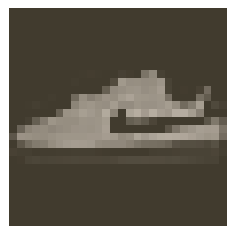

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here
from torch import nn
import torch.nn.functional as F
from torch import optim

from collections import OrderedDict

# Step1 Build Model (Class)

input_dim = 784
hidden_layers = [256,128,64]
output_dim = 10

class Classifier1(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_layers[0])
        self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
        self.fc4 = nn.Linear(hidden_layers[2], output_dim)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = nn.LogSoftmax(dim = 1)(x)
        return x

clasifier1 = Classifier1()

       


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [4]:
# TODO: Create the network, define the criterion and optimizer

# Step2 Set the loss function
criterion = nn.NLLLoss()

# Step3 Set the Optimizer
optimzer = optim.SGD(clasifier1.parameters(), lr = 0.003)


In [5]:
# TODO: Train the network here

# Step4 Training 
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten the images
        images = images.view(images.shape[0],-1)
        
        # Step4-1 Initializing optimizer
        optimzer.zero_grad()
        
        # Step4-2 Get the Prediction
        output = clasifier1(images)
        
        # Step4-3 Calculate the loss
        loss = criterion(output, labels)
        
        # Step4-4 Backwards the loss
        loss.backward()
        
        # Step4-5 Update Gradient
        optimzer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        
 

Training loss: 2.727117683460463
Training loss: 1.2359002517230475
Training loss: 0.6815920721556841
Training loss: 0.6079103471055977
Training loss: 0.5647841338028532


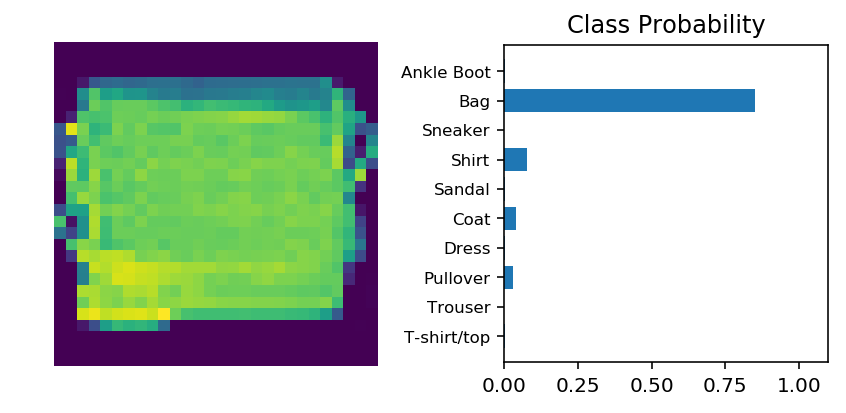

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(clasifier1(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [ ]:
from torch import nn
import torch.nn.functional as F
from torch import optim

from collections import OrderedDict

In [23]:
# Building Model with class

# Step1 Build Model (Class)

input_dim = 784
hidden_layers = [256,128,64]
output_dim = 10

# Class 는 nn.Module, nn.functionals 둘다 가능
class Classifier1(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_layers[0])
        self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
        self.fc4 = nn.Linear(hidden_layers[2], output_dim)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        # x = nn.LogSoftmax(dim = 1)(self.fc4(x))
        return x

# Without torch.nn.functional
# class Classifier1(nn.Module):
#     def __init__(self):
#         super().__init__()
        
#         # layers
#         self.fc1 = nn.Linear(input_dim, hidden_layers[0])
#         self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
#         self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
#         self.fc4 = nn.Linear(hidden_layers[2], output_dim)
        
#         # activations
#         self.act1 = nn.ReLU()
#         self.act2 = nn.ReLU()
#         self.act3 = nn.ReLU()
#         self.act4 = nn.LogSoftmax(dim = 1)
    
#     def forward(self, x):
#         x = self.act1(self.fc1(x))
#         x = self.act2(self.fc2(x))
#         x = self.act3(self.fc3(x))
#         x = self.act4(self.fc4(x))
#         return x

clasifier1 = Classifier1()


# Step2 Set the loss function
criterion = nn.NLLLoss()

# Step3 Set the Optimizer
optimzer = optim.SGD(clasifier1.parameters(), lr = 0.003)

# Step4 Training 
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten the images
        images = images.view(images.shape[0],-1)
        
        # Step4-1 Initializing optimizer
        optimzer.zero_grad()
        
        # Step4-2 Get the Prediction
        output = clasifier1(images)
        
        # Step4-3 Calculate the loss
        loss = criterion(output, labels)
        
        # Step4-4 Backwards the loss
        loss.backward()
        
        # Step4-5 Update Gradient
        optimzer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        
        

Training loss: 2.142662111375886
Training loss: 1.2939008245590145
Training loss: 0.8230158046110353
Training loss: 0.6818011146364436
Training loss: 0.6228013951450523


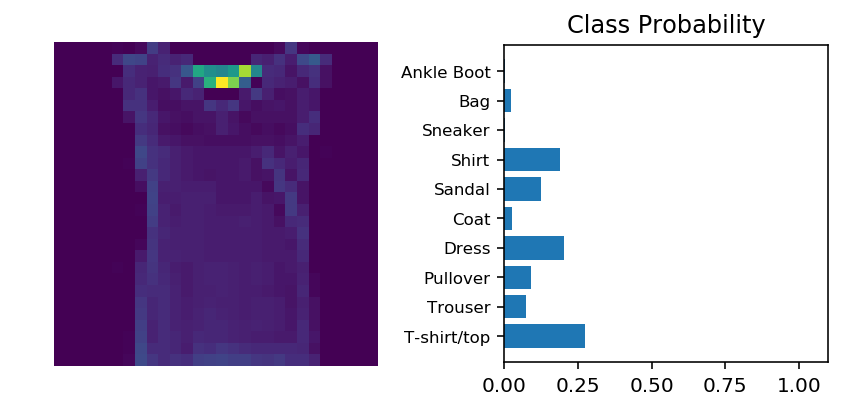

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(clasifier1(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [24]:
from torch import nn
import torch.nn.functional as F
from torch import optim

from collections import OrderedDict

In [25]:
# Step1 Build Model (Sequential)

input_dim = 784
hidden_layers = [256,128,64]
output_dim = 10

# You can’t add F.relu in a nn.Sequential, as it expects an object that is inherited from nn.Module.

# Sequential 은 nn.Module만 가능
classifier2 = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(input_dim, hidden_layers[0])),
    ('act1',nn.ReLU()),
    ('fc2', nn.Linear(hidden_layers[0], hidden_layers[1])),
    ('act2',nn.ReLU()),
    ('fc3', nn.Linear(hidden_layers[1], hidden_layers[2])),
    ('act3',nn.ReLU()),
    ('fc4', nn.Linear(hidden_layers[2], output_dim)),
    ('act4',nn.ReLU()),
    ('softmax', nn.LogSoftmax(dim = 1))
]))

classifier2

Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (act4): ReLU()
  (softmax): LogSoftmax()
)

In [26]:
# Step 2 set up loss
criterion2 = nn.NLLLoss()

# Step 3 set up optimizer
optimizer2 = optim.SGD(classifier2.parameters(), lr = 0.003)


In [27]:
# Step4 Training
epochs = 5

for epoch in range(epochs):
    runing_loss = 0
    for images, labels in trainloader:
        # Change input shape if needed
        images = images.view(images.shape[0], -1)
        
        # Step4-1 Initializing Optim
        optimizer2.zero_grad()
        
        # Step4-2 Get prediction
        outputs = classifier2(images)
        
        # Step4-3 Calculate Loss
        loss = criterion2(outputs, labels)
        
        # Step4-4 Backwards the Loss
        loss.backward()
        
        # Step4-5 update the gradient
        optimizer2.step()
        
        runing_loss += loss.item()
    else:
        print(f"Training loss: {runing_loss/len(trainloader)}")

Training loss: 2.1863570106563284
Training loss: 1.588087020906558
Training loss: 1.1678468682872716
Training loss: 1.0132520810754568
Training loss: 0.9532774065349148


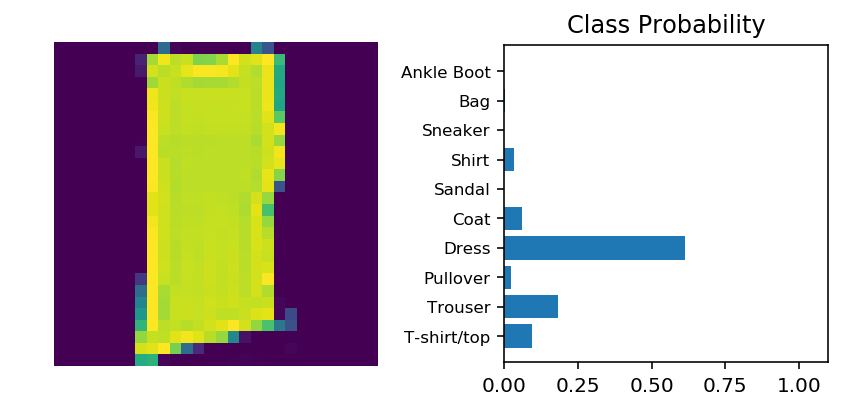

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(clasifier1(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')